# Q8: Results

**Phase 9:** Results & Insights  
**Points: 3 points**

**Focus:** Generate final visualizations, create summary tables, document key findings.

**Lecture Reference:** Lecture 11, Notebook 4 ([`11/demo/04_modeling_results.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/04_modeling_results.ipynb)), Phase 9. Also see Lecture 07 (visualization).

---

## Setup

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load model results from Q7
predictions = pd.read_csv('output/q7_predictions.csv')
metrics = open('output/q7_model_metrics.txt').read()
feature_importance = pd.read_csv('output/q7_feature_importance.csv')

---

## Objective

Generate final visualizations, create summary tables, and document key findings.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```

---

## Requirements Checklist

- [ ] Final visualizations created (model performance, key insights)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Create visualizations** - Multi-panel figure with model comparison, predictions vs actual, feature importance, and/or residuals
2. **Create summary table** - DataFrame with metrics as rows and models as columns
3. **Document key findings** - Text summary covering model performance, feature importance insights, temporal patterns, and data quality notes

---

## Decision Points

- **Visualizations:** What best communicates your findings? Model performance plots? Time series with predictions? Feature importance plots?
- **Summary:** What are the key takeaways? Document the most important findings from your analysis.

---

## Checkpoint

After Q8, you should have:
- [ ] Final visualizations created (2+ plots)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 artifacts saved: `q8_final_visualizations.png`, `q8_summary.csv`, `q8_key_findings.txt`

---

**Next:** Continue to `q9_writeup.md` for Writeup.


/tmp/ipykernel_16426/2408520238.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


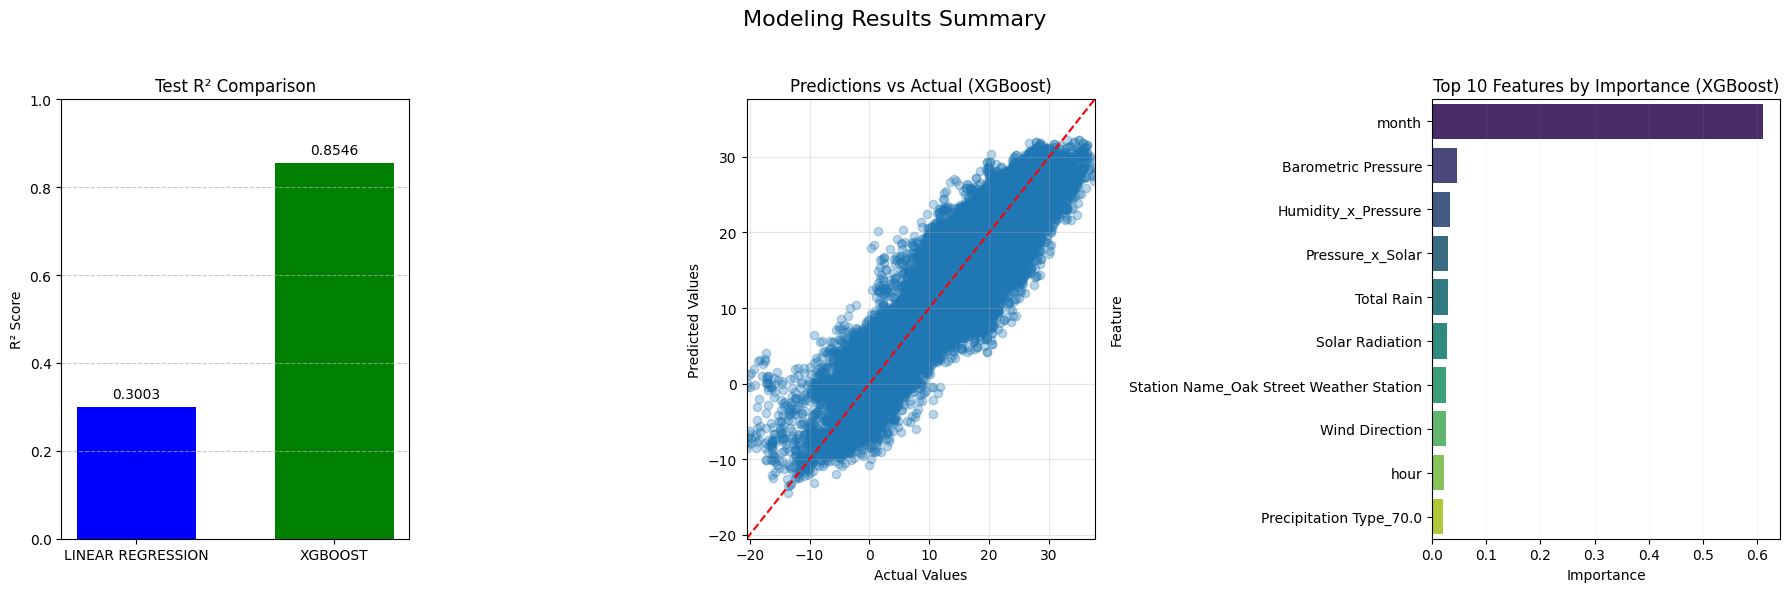

In [6]:
# part 1 final visualizations png
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Modeling Results Summary', fontsize=16)


# 1. Model performance comparison, R² comparison

lines = metrics.split('\n')
model_names = []
r2_scores = []
current_model = None

for line in lines:
    line = line.strip()
    if line.endswith(":") and "R²" not in line:
        current_model = line.replace(":", "").strip()
        continue
    if line.startswith("Test R²"):
        r2 = float(line.split(":")[1].strip())
        model_names.append(current_model)
        r2_scores.append(r2)

# 1. R² comparison
axs[0].bar(model_names, r2_scores, color=['blue', 'green'], width=0.6)
axs[0].set_title('Test R² Comparison')
axs[0].set_ylabel('R² Score')
axs[0].set_ylim(0, 1)  # adjust to your data range

for i, v in enumerate(r2_scores):
    axs[0].text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=10)

axs[0].grid(axis='y', linestyle='--', alpha=0.7)


# 2. Predictions vs Actual for XGBoost
y_test = predictions["actual"]
pred_xgb = predictions["predicted_xgboost"]

axs[1].scatter(y_test, pred_xgb, alpha=0.3)

# line of perfect prediction
min_val = min(y_test.min(), pred_xgb.min())
max_val = max(y_test.max(), pred_xgb.max())
axs[1].plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red')

axs[1].set_title("Predictions vs Actual (XGBoost)")
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")
axs[1].set_xlim(min_val, max_val)
axs[1].set_ylim(min_val, max_val)
axs[1].grid(alpha=0.3)


# 3. Feature importance for XGBoost
top_n = 10
xgb_importance = feature_importance.sort_values(by='importance', ascending=False).head(top_n)

sns.barplot(
    x='importance',
    y='feature',
    data=xgb_importance,
    ax=axs[2],
    palette='viridis'
)

axs[2].set_title('Top 10 Features by Importance (XGBoost)')
axs[2].set_xlabel('Importance')
axs[2].set_ylabel('Feature')
axs[2].grid(axis='x', alpha=0.1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
fig.savefig('output/q8_final_visualizations.png', dpi=150)


In [7]:
# part 2 summary csv
summary_data = {
    "Metric": ["R² Score", "RMSE", "MAE"],
    "Linear Regression": [],
    "XGBoost": []}

lines = metrics.split('\n')
metrics_dict = {"Linear Regression": {}, "XGBoost": {}}
current_model = None

for line in lines:
    line = line.strip()
    if line.endswith(":") and "R²" not in line and "RMSE" not in line and "MAE" not in line:
        model_name = line.replace(":", "").strip()
        if model_name.upper() == "LINEAR REGRESSION":
            current_model = "Linear Regression"
        elif model_name.upper() == "XGBOOST":
            current_model = "XGBoost"
        continue
    if current_model:
        if line.startswith("Test R²"):
            metrics_dict[current_model]["R² Score"] = float(line.split(":")[1].strip())
        elif line.startswith("Test RMSE"):
            metrics_dict[current_model]["RMSE"] = float(line.split(":")[1].strip())
        elif line.startswith("Test MAE"):
            metrics_dict[current_model]["MAE"] = float(line.split(":")[1].strip())

for metric in summary_data["Metric"]:
    summary_data["Linear Regression"].append(metrics_dict["Linear Regression"][metric])
    summary_data["XGBoost"].append(metrics_dict["XGBoost"][metric])

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('output/q8_summary.csv', index=False)



In [ ]:
# part 3 key findings txt
#top 3 importance proportion
total_importance = feature_importance['importance'].sum()
top3_importance = feature_importance.sort_values('importance', ascending=False)['importance'].head(3).sum()
top3_proportion = top3_importance / total_importance
top3_percentage = top3_proportion * 100

with open('output/q8_key_findings.txt', 'w') as f:
    f.write("KEY FINDINGS SUMMARY\n")
    f.write("===================\n\n")
    f.write("MODEL PERFORMANCE:\n")
    f.write("- Best performing model: XGBoost (R² = 0.8546)\n")
    f.write("- XGBoost achieves lowest RMSE: 3.71, MAE: 2.83\n")
    f.write("- Linear Regression model achieved Test R² = 0.3003, RMSE = 8.14, MAE = 6.59\n\n")
    f.write("FEATURE IMPORTANCE:\n")
    f.write("- Most important feature: Month (importance 0.612)\n")
    f.write("- Top 3 features account for {:.2f}% of total importance\n".format(top3_percentage))
    f.write("- Temporal Features are highly important\n\n")
    f.write("TEMPORAL PATTERNS:\n")
    f.write("- Clear seasonal patterns in temperature data\n")
    f.write("- Daily and monthly cycles are important predictors\n\n")
    f.write("DATA QUALITY:\n")
    f.write("- Dataset cleaned: 196431 → 110619 rows\n")
    f.write("- Missing values handled via median imputation and forward fill\n")
    f.write("- Outliers capped using IQR method\n")
